<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166510 entries, 0 to 166509
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    166510 non-null  float64
 1   V1      166510 non-null  float64
 2   V2      166510 non-null  float64
 3   V3      166510 non-null  float64
 4   V4      166510 non-null  float64
 5   V5      166510 non-null  float64
 6   V6      166510 non-null  float64
 7   V7      166510 non-null  float64
 8   V8      166509 non-null  float64
 9   V9      166509 non-null  float64
 10  V10     166509 non-null  float64
 11  V11     166509 non-null  float64
 12  V12     166509 non-null  float64
 13  V13     166509 non-null  float64
 14  V14     166509 non-null  float64
 15  V15     166509 non-null  float64
 16  V16     166509 non-null  float64
 17  V17     166509 non-null  float64
 18  V18     166509 non-null  float64
 19  V19     166509 non-null  float64
 20  V20     166509 non-null  float64
 21  V21     16

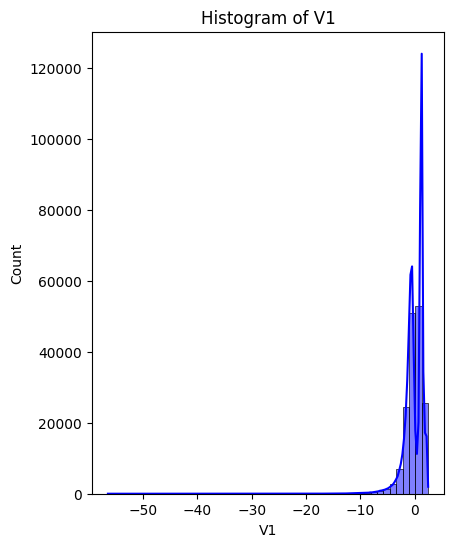

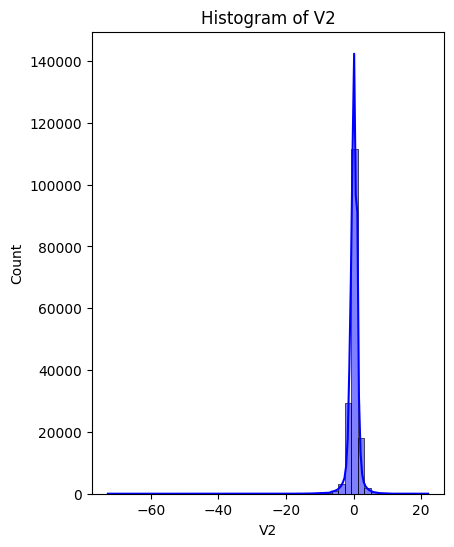

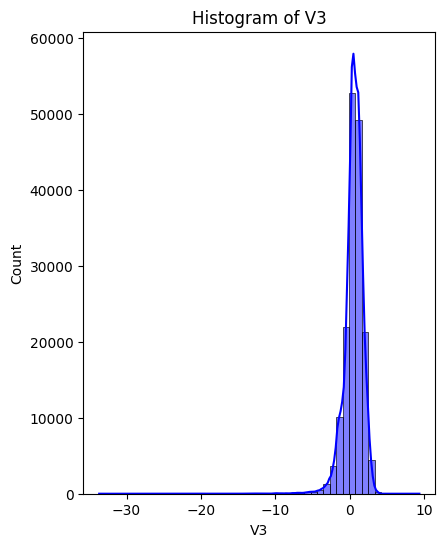

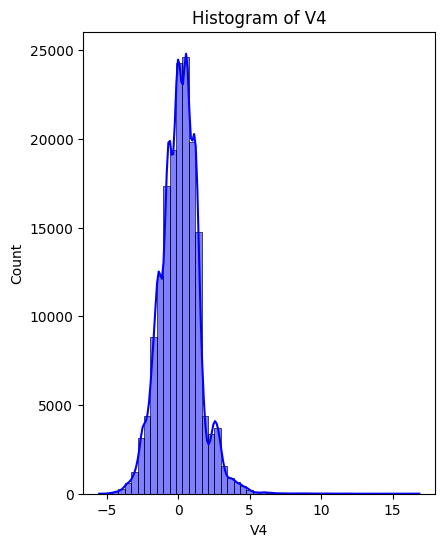

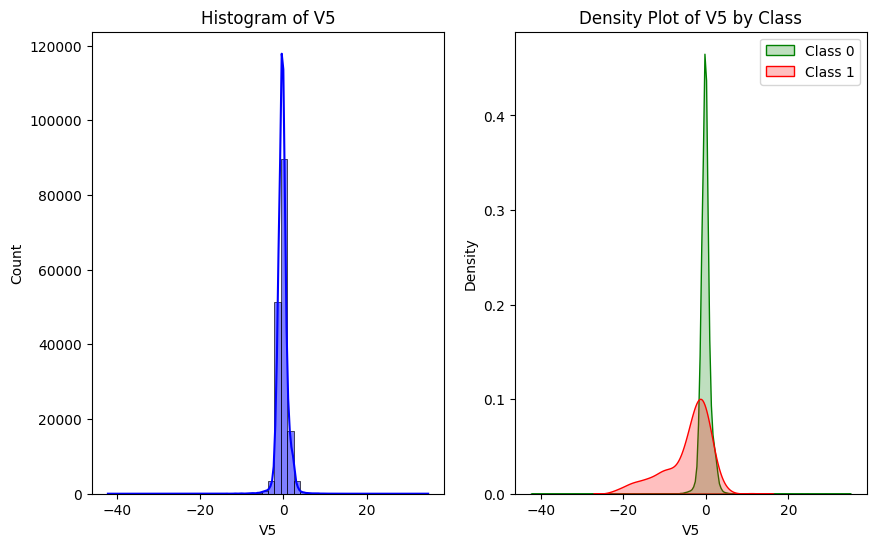

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())

# Display the class distribution
print("Class Distribution:")
print(df['Class'].value_counts())

# Data Distribution Analysis
# i. Examine the distributions of numerical variables using histograms and density plots.

# Select only the numerical features (assuming features V1 to V28 are numerical)
numerical_features = df.columns[1:6]

# Plot histograms and density plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=50, kde=True, color='blue')
    plt.title(f'Histogram of {feature}')

plt.subplot(1, 2, 2)
sns.kdeplot(df.loc[df['Class'] == 0, feature], label='Class 0', color='green', fill=True)
sns.kdeplot(df.loc[df['Class'] == 1, feature], label='Class 1', color='red', fill=True)
plt.title(f'Density Plot of {feature} by Class')
plt.legend()


plt.show()
# Close the figure aftser show
plt.close()

# ii. Look for deviations from normality and consider appropriate transformations.
# You may want to apply transformations like log transformation for highly skewed features.

# Split the data into features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalanced dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56862     2]
 [   24    74]]


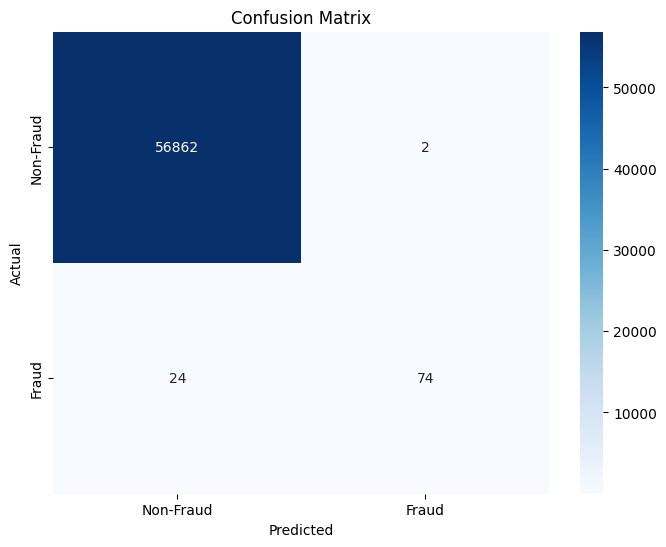

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'target' is the name of the target variable column
# and 'features' contains the list of feature columns
target_column = 'target'
feature_columns = ['V1', 'V2', 'V3', 'V4', 'V5']

# Read the CSV file into a DataFrame
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a trained classifier named 'classifier'
classifier = RandomForestClassifier()  # Replace with your actual classifier
classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and F1 score
y_pred = classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Calculate and print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



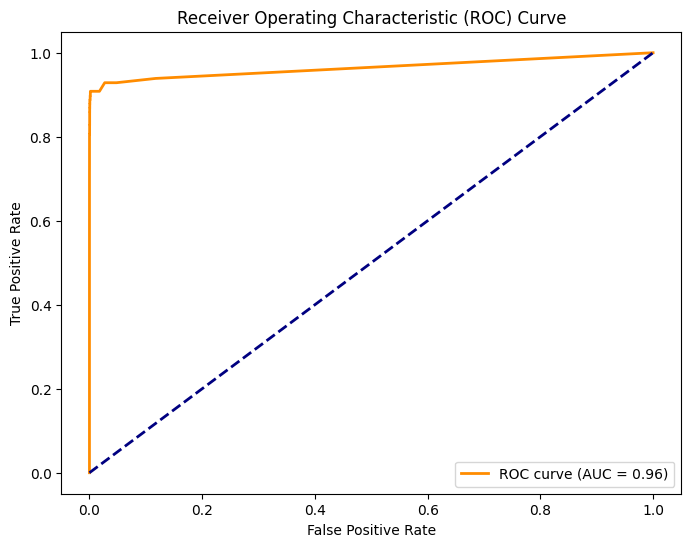

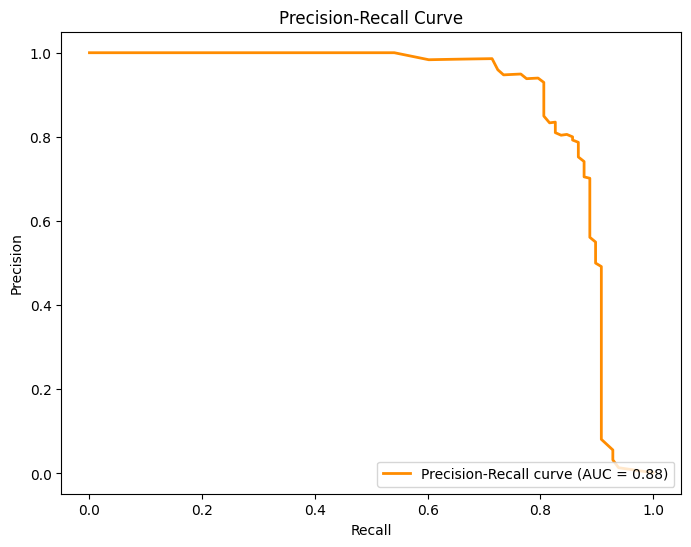

Confusion Matrix:
 [[56848    16]
 [   17    81]]


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
# Read the CSV file into a DataFrame
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

# Assuming 'df' is your dataset and 'Class' is the target column
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier (Random Forest in this example)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_resampled, y_resampled)

# Calculate precision, recall, and F1 score
y_pred = classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Calculate ROC curve and AUC-ROC
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve and AUC-PR
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)


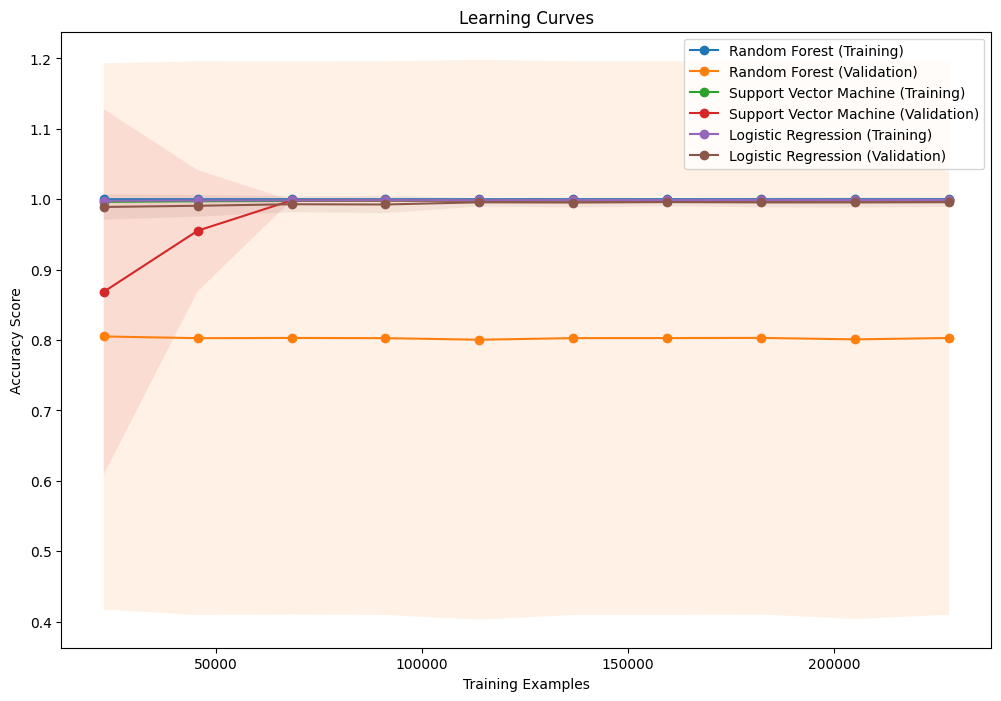

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

# Assuming 'df' is your dataset and 'Class' is the target column
X = df.drop('Class', axis=1)
y = df['Class']

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression()
}

plt.figure(figsize=(12, 8))
plt.title("Learning Curves")

for name, clf in classifiers.items():
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(
        train_sizes, train_scores_mean,
        label=f"{name} (Training)", marker='o'
    )
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1
    )

    plt.plot(
        train_sizes, test_scores_mean,
        label=f"{name} (Validation)", marker='o'
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1
    )

plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Load the dataset
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

X = df.drop('Class', axis=1)
y = df['Class']

#  The target column
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, solver='liblinear')

# Use cross_val_predict to get predicted probabilities
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

# Create a KNeighborsClassifier model
knears_neighbors = KNeighborsClassifier()

# Create a Decision Tree Classifier model
tree_clf = DecisionTreeClassifier()

# Use cross_val_predict to get predicted labels
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

# Create a Support Vector Classifier model
svc = SVC(probability=True)  # Note: probability=True enables probability estimates

# Use cross_val_predict to get predicted probabilities
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

classifiers = {
    'Logistic Regression': log_reg_pred,
    'KNears Neighbors': knears_pred,
    'Support Vector Classifier': svc_pred,
    'Decision Tree Classifier': tree_pred
}

for name, pred in classifiers.items():
    print(f'{name} AUC: {roc_auc_score(y_train, pred)}')

Logistic Regression:  0.9162477389284069
KNears Neighbors:  0.5228338464912183
Support Vector Classifier:  0.5604802435609102
Decision Tree Classifier:  0.8829783430567419
Logistic Regression AUC: 0.9162477389284069
KNears Neighbors AUC: 0.5228338464912183
Support Vector Classifier AUC: 0.5604802435609102
Decision Tree Classifier AUC: 0.8829783430567419


In [9]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

# 'Class' is the target column
X = df.drop('Class', axis=1)
y = df['Class']

# 'LogisticRegression()'

# 'X' is the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = LogisticRegression(max_iter=2000)
cv_scores = cross_val_score(clf, X_scaled, y, cv=5)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-validated Accuracy Scores: [0.98239177 0.99942067 0.99878864 0.99935043 0.99892909]
Mean Accuracy: 0.995776121162071
